<a href="https://colab.research.google.com/github/maudl3116/Distribution_Regression_Streams/blob/master/Looking_For_Good_Synthetic_Datasets_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Testing-pipeline" data-toc-modified-id="Testing-pipeline-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testing pipeline</a></span></li><li><span><a href="#Comparison-Sig-Kernel-and-RBF-Kernel" data-toc-modified-id="Comparison-Sig-Kernel-and-RBF-Kernel-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison Sig-Kernel and RBF-Kernel</a></span></li></ul></div>

In [0]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'     
PROJ = 'My Drive/Distribution_Regression_Proj'       

drive.mount(ROOT)           # we mount the drive at /content/drive

PROJECT_PATH = join(ROOT, PROJ)

GIT_PATH = "https://d1f5fb17f9201eeb70248ecea10d65a859c2fffe@github.com/maudl3116/Distribution_Regression_Streams.git"

!git clone "{GIT_PATH}"


In [3]:
!pip install iisignature

     |████████████████████████████████| 1.3MB 7.4MB/s 
  Created wheel for iisignature: filename=iisignature-0.24-cp36-cp36m-linux_x86_64.whl size=2528029 sha256=46ce38e3c7822823f1819b4786ef8a2c5cef97aea0e1e0b58b7c2599699bd8c5
  Stored in directory: /root/.cache/pip/wheels/57/33/98/2b03151aa0378df847a71a66ab6ed8f7594d310e11dcd60ed7
Successfully built iisignature


In [12]:
%cd Distribution_Regression_Streams
!git pull

[Errno 2] No such file or directory: 'Distribution_Regression_Streams'
/content/Distribution_Regression_Streams
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/maudl3116/Distribution_Regression_Streams
   e4ae73c..b50a2ed  master     -> origin/master
Updating e4ae73c..b50a2ed
Fast-forward
 Looking_For_Good_Synthetic_Datasets.ipynb | 20 ++++++++++----------
 experiment_script.py                      |  6 +++---
 2 files changed, 13 insertions(+), 13 deletions(-)


In [0]:
import sys
sys.path.append("Distribution_Regression_Streams/")
from importlib import reload
import numpy as np
import data_generators.ellipsis
from data_generators import ellipsis
import utils
from utils import *
import GP_models as GP_models
from GP_models import GP_classic as GP_naive
from GP_models import GP_sig_precomputed as GP_sig
import experiments
from experiments import * 
import signature_features
from signature_features import *
from experiment_script import exp1

In [0]:
reload(ellipsis)

N_bags = 100
N_items = 10
tspan = np.linspace(0.0, 10*np.pi, 500)
spec_param = {'a':[1.,3.], 'b':[1.,3.]} #,'stdv_noise':[None]}

example = ellipsis.Ellipsis()
example.generate_data(N_bags=N_bags,N_items=N_items, t_span = tspan,spec_param=spec_param, stdv_pos=0., stdv_noise=0.01)
example.get_e_ang()

In [0]:
example.subsample_paths(N=100,same_grid_items=False)


In [0]:
reload(utils)
data_scaled, y_scaled, train_indices, test_indices = utils.split_standardize(example.labels,example.paths,standardized=True,method='stratify')

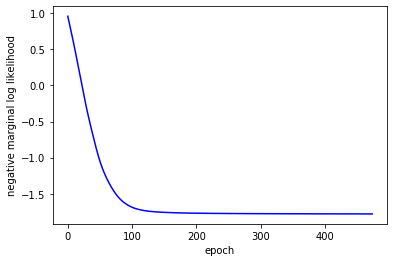

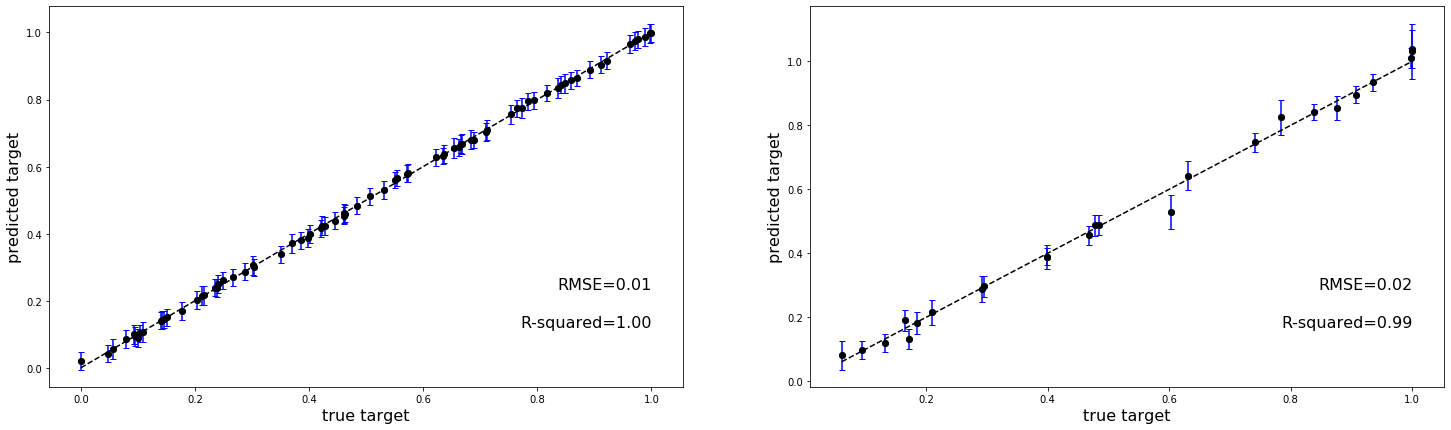

0.9945432176662264


In [25]:
reload(GP_naive)
reload(experiments)
res = []


# stack dimensions
dim_1 = np.array(np.array(data_scaled)[:,:,:,0])
dim_2 = np.array(np.array(data_scaled)[:,:,:,1])
input_ = np.concatenate([dim_1,dim_2],axis=2)


RMSE_train, R2_train, RMSE_test, R2_test = experiments.naive_experiment(input_, y_scaled ,train_indices,test_indices,param_init=[5,1,0],plot=True,device=torch.device('cuda'))
res.append(R2_test)

print(np.mean(res))